<a href="https://colab.research.google.com/github/phuongabu141/DA_PT_DS105.M11/blob/main/doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Tổng quan về data

In [7]:
df=pd.read_csv('/content/drive/MyDrive/PHAN_TICH_VA_TRUC_QUAN_HOA_DATA/do_an/kaggle_survey_2020_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



In [8]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [9]:
df.shape

(20037, 355)

In [10]:
list(df.columns)

['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7_Part_1',
 'Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER',
 'Q8',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_Part_9',
 'Q9_Part_10',
 'Q9_Part_11',
 'Q9_OTHER',
 'Q10_Part_1',
 'Q10_Part_2',
 'Q10_Part_3',
 'Q10_Part_4',
 'Q10_Part_5',
 'Q10_Part_6',
 'Q10_Part_7',
 'Q10_Part_8',
 'Q10_Part_9',
 'Q10_Part_10',
 'Q10_Part_11',
 'Q10_Part_12',
 'Q10_Part_13',
 'Q10_OTHER',
 'Q11',
 'Q12_Part_1',
 'Q12_Part_2',
 'Q12_Part_3',
 'Q12_OTHER',
 'Q13',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q14_OTHER',
 'Q15',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_

In [11]:
df=df.iloc[1:]

#Q1: Tuổi của người khảo sát

In [ ]:
df['Q1'].value_counts()

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [ ]:
df['Q1'].isnull().sum(axis=0)

0

In [ ]:
# age max, age min
df['Q1_Part_1'], df['Q1_Part_2'] = df['Q1'].str.split('-', 1).str
# Ở cột age max('Q1_part_2') những sample bị thiếu là những sample có age thuộc khoảng 70+ nên ở cột ('Q1_part_2') giá trị null sẽ được điền là 75
df['Q1_Part_2']=df['Q1_Part_2'].fillna(75)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [ ]:
# Chuyển kiểu dữ liệu của 2 attribute age min'Q1_Part_1' và age max'Q1_Part_2' thành kiểu float

df["Q1_Part_1"] = pd.to_numeric(df["Q1_Part_1"], errors='coerce').astype('float')
df["Q1_Part_2"] = pd.to_numeric(df["Q1_Part_2"], errors='coerce').astype('float')

In [ ]:
# Lấy trung bình tuổi
df['Q1'] = (df['Q1_Part_1'] + df['Q1_Part_2'])/2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

age = pd.DataFrame(df['Q1'].value_counts())
age.sort_index(inplace=True)
age.reset_index(inplace = True)
age.columns = ["Age", "Count"]


fig = px.bar(data_frame=age, 
      x = "Age", 
      y = "Count", 
      title= "Age Distribution", 
      template="seaborn")
fig.update_layout(title_x=0.5)



Từ biểu đồ trên, ta thấy được rằng độ tuổi từ 25-29 chiếm nhiều nhất và sau đó là những độ tuổi từ 18-21, 22-24 

#Q2: Giới tính

In [ ]:
df['Q2'].value_counts()

Man                                       15789
Woman                                      3878
Prefer not to say                           263
Prefer to self-describe                      54
Nonbinary                                    52
What is your gender? - Selected Choice        1
Name: Q2, dtype: int64

Q2: giới tính

In [ ]:

df['Q2'].isnull().sum(axis = 0)

0

In [ ]:
gender = pd.DataFrame(df['Q2'].value_counts())
gender.sort_index(inplace=True)
gender.reset_index(inplace = True)
gender.columns = ["Gender", "Count"]
gender

fig = px.bar(data_frame=gender, 
      x = "Gender", 
      y = "Count", 
      title= "Gender Distribution", 
      template="seaborn")
fig.update_layout(title_x=0.5)

In [ ]:
fig = px.pie(data_frame=df, 
             names='Q2', 
             color_discrete_sequence=px.colors.sequential.Teal_r[2:], 
             labels={"Q2":"Gender"}, 
             title = "Gender Distribution", 
             template="seaborn"
            )
fig.update_layout(
    title_x=0.5,
    autosize = True
)
fig.update_traces(textposition='inside', 
                  textinfo='percent+label')

Từ biểu đồ piechart trên chúng ta thấy được Nam chiếm 79,8% gần bằng 80 %,nữ chỉ chiếm 19,6% tức là gần 1/5 số người khảo sát -> Như vây, có vẻ như vấn đề giới tính cũng đang rất ảnh hướng tới ngành nghề này.

#Q3: Quốc gia 

In [ ]:
df['Q3'].head()

1                    Colombia
2    United States of America
3                   Argentina
4    United States of America
5                       Japan
Name: Q3, dtype: object

In [ ]:
df['Q3'].value_counts

<bound method IndexOpsMixin.value_counts of 1                                                 Colombia
2                                 United States of America
3                                                Argentina
4                                 United States of America
5                                                    Japan
                               ...                        
20032                                               Turkey
20033    United Kingdom of Great Britain and Northern I...
20034                                               Brazil
20035                                                India
20036                                             Pakistan
Name: Q3, Length: 20036, dtype: object>

In [ ]:
df['Q3'].isnull().sum(axis=0)

0

In [ ]:
country = pd.DataFrame(df['Q3'].value_counts())
country.sort_index(inplace=True)
country.reset_index(inplace = True)
country.columns = ["Country", "Count"]


In [ ]:
#top 10 quốc gia có người tham gia khảo sát nhiều nhất 
country_t10 = country.sort_values('Count',ascending=False).head(10)
country_t10

,Country,Count
15,India,5851
53,United States of America,2237
29,Other,1388
5,Brazil,694
21,Japan,638
37,Russia,582
52,United Kingdom of Great Britain and Northern I...,489
28,Nigeria,476
8,China,474
12,Germany,404


In [ ]:
fig = px.bar(data_frame=country_t10, 
      x = "Country", 
      y = "Count", 
      title= "Country Top10 Distribution", 
      template="seaborn")
fig.update_layout(title_x=0.5)

Từ biểu đồ, số nười khỏa sát ở quốc giá India chiếm nhiều nhất(5851)

#Q4 - trình độ học vấn đã đạt được hoặc dự định 

In [ ]:
df['Q4'].head()

1      Doctoral degree
2      Master’s degree
3    Bachelor’s degree
4      Master’s degree
5      Master’s degree
Name: Q4, dtype: object

In [ ]:
df['Q4'].value_counts()

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

In [ ]:
df['Q4'].isnull().sum(axis=0)

467

In [ ]:
# Điền dữ liệu null thành 'I prefer not to answer ' bởi có ý nghĩa tương đối giống nhau
df['Q4']=df['Q4'].fillna('I prefer not to answer ')

In [ ]:
education = pd.DataFrame(df['Q4'].value_counts())
education.sort_index(inplace=True)
education.reset_index(inplace = True)
education.columns = ["Education", "Count"]
education

,Education,Count
0,Bachelor’s degree,6978
1,Doctoral degree,2302
2,I prefer not to answer,399
3,I prefer not to answer,467
4,Master’s degree,7859
5,No formal education past high school,240
6,Professional degree,699
7,Some college/university study without earning ...,1092


In [ ]:
fig = px.bar(data_frame=education, 
      x = "Education", 
      y = "Count", 
      title= " Education Distribution", 
      template="seaborn")
fig.update_layout(title_x=0.5)

Trình độ đã đạt được và dự định học là Master’s degree và Bachelor’s degree

#Q5: vị trí công việc hiện tại (Job)

In [ ]:
df['Q5'].head()

1              Student
2        Data Engineer
3    Software Engineer
4       Data Scientist
5    Software Engineer
Name: Q5, dtype: object

In [ ]:
df['Q5'].value_counts()

Student                      5171
Data Scientist               2676
Software Engineer            1968
Other                        1737
Currently not employed       1652
Data Analyst                 1475
Research Scientist           1174
Machine Learning Engineer    1082
Business Analyst              798
Product/Project Manager       692
Data Engineer                 437
Statistician                  290
DBA/Database Engineer         125
Name: Q5, dtype: int64

In [ ]:
df['Q5'].isnull().sum(axis=0)

759

In [ ]:
#Điền dữ liệu thiếu bởi dữ liệu nhiều nhất
df.Q5.fillna(df.Q5.mode()[0],inplace=True)

In [ ]:
job = pd.DataFrame(df['Q5'].value_counts())
job.sort_index(inplace=True)
job.reset_index(inplace = True)
job.columns = ["Job", "Count"]
job

,Job,Count
0,Business Analyst,798
1,Currently not employed,1652
2,DBA/Database Engineer,125
3,Data Analyst,1475
4,Data Engineer,437
5,Data Scientist,2676
6,Machine Learning Engineer,1082
7,Other,1737
8,Product/Project Manager,692
9,Research Scientist,1174


In [ ]:
fig = px.bar(data_frame=job, 
      x = "Job", 
      y = "Count", 
      title= " Job Distribution", 
      template="seaborn")
fig.update_layout(title_x=0.5)

Như vậy, người khảo sát chiếm nhiều nhất và chủ yếu là học sinh

#Q6: thời gian viết code

In [ ]:
df['Q6'].head()

1     5-10 years
2     5-10 years
3    10-20 years
4     5-10 years
5      3-5 years
Name: Q6, dtype: object

In [ ]:
df['Q6'].value_counts()

3-5 years                    4546
1-2 years                    4505
< 1 years                    3313
5-10 years                   2552
10-20 years                  1751
20+ years                    1329
I have never written code    1124
Name: Q6, dtype: int64

In [ ]:
df['Q6'].isnull().sum(axis=0)

916

In [ ]:
df['Q6'].replace('I have never written code','0',inplace=True)

In [ ]:
# điền dữ liệu thiếu = dữ liệu xuất hiện nhiều nhất 

df.Q6.fillna(df.Q6.mode()[0],inplace=True)

In [ ]:
df['Q6'].value_counts()

3-5 years      5462
1-2 years      4505
< 1 years      3313
5-10 years     2552
10-20 years    1751
20+ years      1329
0              1124
Name: Q6, dtype: int64

In [ ]:
df['Q6'] = df['Q6'].str.replace('< ', '1-')
df['Q6'] = df['Q6'].str.replace('+', '-20')

In [ ]:
df['Q6'].value_counts()

3-5 years      5462
1-2 years      4505
1-1 years      3313
5-10 years     2552
10-20 years    1751
20-20 years    1329
0              1124
Name: Q6, dtype: int64

In [ ]:
# 
df['Q6'] = df['Q6'].str.replace('years', '')


In [ ]:
df['Q6'].value_counts()

3-5       5462
1-2       4505
1-1       3313
5-10      2552
10-20     1751
20-20     1329
0         1124
Name: Q6, dtype: int64

In [ ]:
# tách thành 2 cột year min, year max

df['Q6_Part_1'], df['Q6_Part_2'] = df['Q6'].str.split('-', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [ ]:
# Chuyển kiểu dữ liệu thanhf float

df["Q6_Part_1"] = pd.to_numeric(df["Q6_Part_1"], errors='coerce').astype('float')
df["Q6_Part_2"] = pd.to_numeric(df["Q6_Part_2"], errors='coerce').astype('float')

In [ ]:
# tính trung bình của max và min -> trả về giá trị của số năm trung bình viết code
df['Q6'] = (df['Q6_Part_1'] + df['Q6_Part_2'])/2

In [ ]:
df['Q6'].value_counts()

4.0     5462
1.5     4505
1.0     3313
7.5     2552
15.0    1751
20.0    1329
Name: Q6, dtype: int64

In [ ]:
df.Q6.fillna(df.Q6.mode()[0],inplace=True)

In [ ]:
df['Q6'].isnull().sum(axis=0)

0

In [ ]:
year_code = pd.DataFrame(df['Q6'].value_counts())
year_code.sort_index(inplace=True)
year_code.reset_index(inplace = True)
year_code.columns = ["Year_code", "Count"]


In [ ]:
year_code.head()

,Year_code,Count
0,1.0,3313
1,1.5,4505
2,4.0,6586
3,7.5,2552
4,15.0,1751


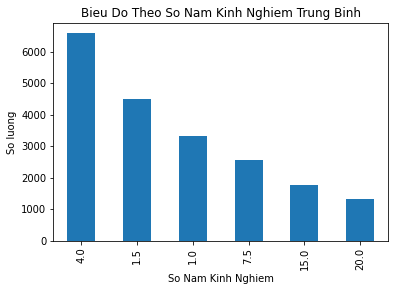

In [ ]:
ax = plt.subplots()
ax=df.Q6.value_counts().plot(kind='bar')
ax.set_xlabel("So Nam Kinh Nghiem")
ax.set_ylabel("So luong")
ax.set_title("Bieu Do Theo So Nam Kinh Nghiem Trung Binh")
plt.show()

Số người khảo sát viết code chiếm nhiều nhất là 4 năm 

#Q7: Những ngôn ngữ lập trình sử dụng

In [ ]:
df_Q7 = df.iloc[:,range(7,20)]
df_Q7.head()

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Q7 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q7_")):
        Q7 = df[c].value_counts()
        df_Q7 = df_Q7.append({'Q7':Q7.index[0], 'Count':Q7[0]}, ignore_index=True)
df_Q7 = df_Q7.set_index('Q7').drop('None')
df_Q7 = df_Q7.sort_values(by='Count', ascending=False)
df_Q7

,Count
Q7,
Python,15530.0
SQL,7535.0
R,4277.0
C++,3827.0
Java,3367.0
C,3315.0
Javascript,2995.0
MATLAB,2217.0
Other,1945.0


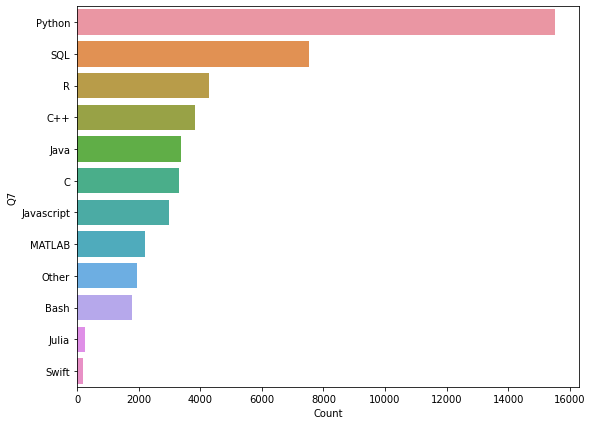

In [ ]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q7.index, data=df_Q7)

Từ hình trên ta thấy Python là ngôn ngữ mà những người học hoặc làm về data scien sử dụng nhiều nhất.

#Q8: Ngôn ngữ khuyến khích sử dụng đầu tiên cho việc học data science

In [ ]:

df['Q8'].head()

1    Python
2    Python
3         R
4    Python
5    Python
Name: Q8, dtype: object

In [ ]:
df['Q8'].isnull().sum(axis=0)

2215

In [ ]:
df['Q8'].value_counts()

Python        14241
R              1259
SQL             849
C++             325
C               301
MATLAB          195
Java            167
Other           151
Julia           121
Javascript       88
None             81
Bash             26
Swift            17
Name: Q8, dtype: int64

In [ ]:
df.Q8.fillna(df.Q8.mode()[0],inplace=True)

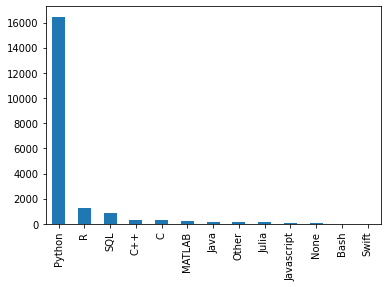

In [ ]:
df.Q8.value_counts().plot(kind = 'bar')

Từ đồ thị, Python là ngôn ngữ khuyến khích nhất cho việc học data science

#Q9: IDE su dung 

In [ ]:

df_Q9 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q9_")):
        Q9 = df[c].value_counts()
        df_Q9 = df_Q9.append({'Q9':Q9.index[0], 'Count':Q9[0]}, ignore_index=True)
df_Q9 = df_Q9.set_index('Q9').drop('None')
df_Q9 = df_Q9.sort_values(by='Count', ascending=False)
df_Q9

,Count
Q9,
"Jupyter (JupyterLab, Jupyter Notebooks, etc)",11211.0
Visual Studio Code (VSCode),5873.0
PyCharm,5099.0
RStudio,3826.0
Spyder,3290.0
Notepad++,3132.0
Sublime Text,2452.0
Visual Studio,2445.0
MATLAB,1604.0


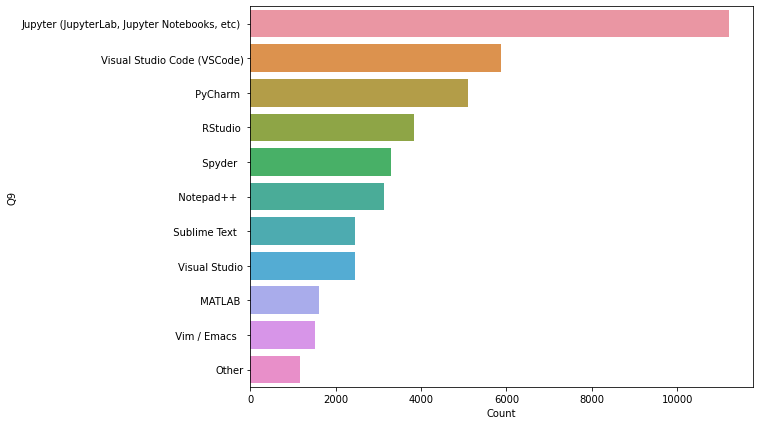

In [ ]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q9.index, data=df_Q9)

Từ đồ thị trên, Jupyter (JupyterLab, Jupyter Notebooks, etc) là IDE được sử dụng nhiều nhất

#Q10: Các sản phẩm được lưu trữ mà thường sử dụng:

In [12]:

df_Q10=df.iloc[:,range(33,47)]
set(df_Q10)

{'Q10_OTHER',
 'Q10_Part_1',
 'Q10_Part_10',
 'Q10_Part_11',
 'Q10_Part_12',
 'Q10_Part_13',
 'Q10_Part_2',
 'Q10_Part_3',
 'Q10_Part_4',
 'Q10_Part_5',
 'Q10_Part_6',
 'Q10_Part_7',
 'Q10_Part_8',
 'Q10_Part_9'}

In [13]:

df_Q10 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q10_")):
        Q10 = df[c].value_counts()
        df_Q10 = df_Q10.append({'Q10':Q10.index[0], 'Count':Q10[0]}, ignore_index=True)
df_Q10 = df_Q10.set_index('Q10').drop('None')
df_Q10= df_Q10.sort_values(by='Count', ascending=False)
df_Q10

,Count
Q10,
Colab Notebooks,6329.0
Kaggle Notebooks,5992.0
Binder / JupyterHub,2072.0
Google Cloud Datalab Notebooks,1231.0
Google Cloud AI Platform Notebooks,1218.0
Azure Notebooks,857.0
IBM Watson Studio,846.0
Amazon Sagemaker Studio,497.0
Other,485.0


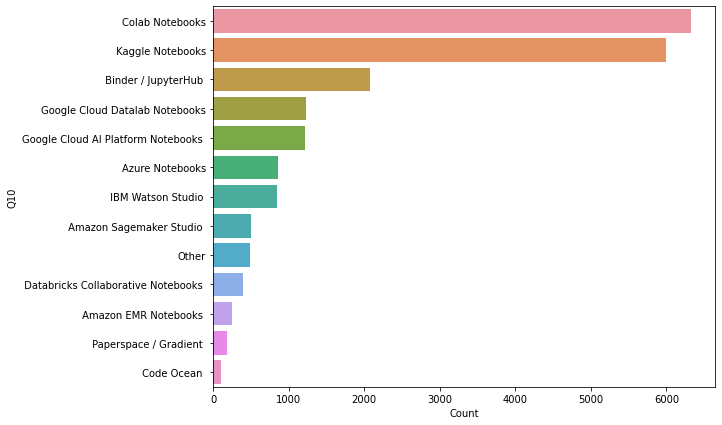

In [14]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q10.index, data=df_Q10)

Từ hình trên, ta thấy top 2 các sản phẩm được sử dụng lưu trữ thường sử dụng nhất là: Colab notebooks, kaggle notebooks, 

#Q11: Loại nền tảng máy tính thường sử dụng cho dự án data science

In [15]:

set(df['Q11'])

{'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
 'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)',
 'A personal computer or laptop',
 'None',
 'Other',
 nan}

In [16]:
df['Q11'].value_counts()

A personal computer or laptop                                          13348
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)     2358
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                834
None                                                                     292
Other                                                                    197
Name: Q11, dtype: int64

In [17]:
df['Q11'].isnull().sum(axis=0)

3007

In [18]:
df.Q11.fillna(df.Q11.mode()[0],inplace=True)

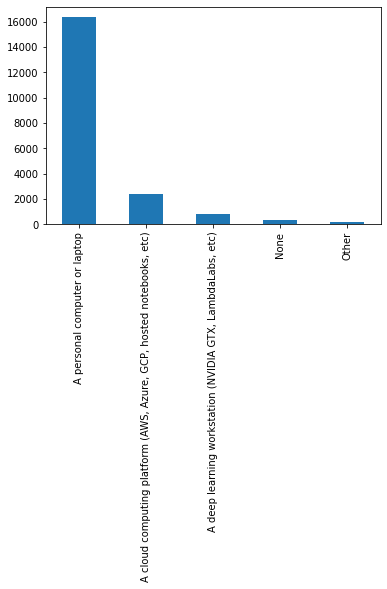

In [19]:
df.Q11.value_counts().plot(kind = 'bar')

#Q12: Phần cứng sử dụng để xử lí:

In [20]:

df_Q12 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q12_")):
        Q12 = df[c].value_counts()
        df_Q12 = df_Q12.append({'Q12':Q12.index[0], 'Count':Q12[0]}, ignore_index=True)
df_Q12 = df_Q12.set_index('Q12').drop('None')
df_Q12= df_Q12.sort_values(by='Count', ascending=False)
df_Q12

,Count
Q12,
GPUs,8310.0
TPUs,960.0
Other,666.0


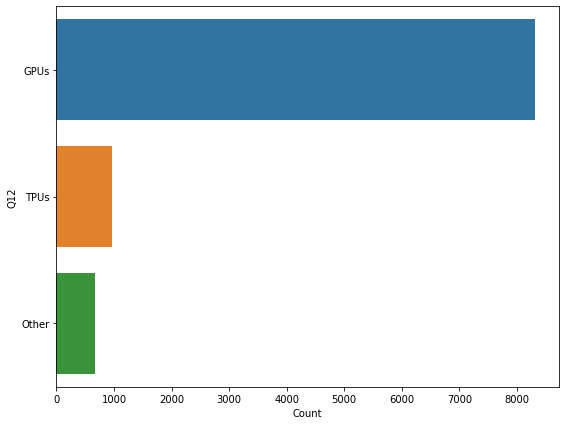

In [21]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q12.index, data=df_Q12)

#Q13: Bạn đã sử dụng TPU khoảng bao nhiêu lần? 

In [22]:
df['Q13'].value_counts()

Never                 12050
2-5 times              2112
Once                   1922
6-25 times              424
More than 25 times      272
Name: Q13, dtype: int64

In [23]:
df['Q13'].isnull().sum(axis=0)

3256

In [24]:
df['Q13'] = df['Q13'].str.replace('Never', '0')
df['Q13'] = df['Q13'].str.replace('Once', '1')
df['Q13'] = df['Q13'].str.replace('More than 25 times', '25')
df['Q13'] = df['Q13'].str.replace('2-5 times','4')
df['Q13'] = df['Q13'].str.replace('6-25 times','16')

In [25]:
df.Q13.fillna(df.Q13.mode()[0],inplace=True)

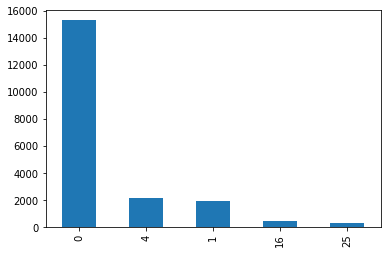

In [26]:
df.Q13.value_counts().plot(kind = 'bar')

#Q14: thư viện hoặc công cụ trực quan hóa dữ liệu

In [27]:
df_Q14 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q14_")):
        Q14 = df[c].value_counts()
        df_Q14 = df_Q14.append({'Q14':Q14.index[0], 'Count':Q14[0]}, ignore_index=True)
df_Q14 = df_Q14.set_index('Q14').drop('None')
df_Q14= df_Q14.sort_values(by='Count', ascending=False)
df_Q14



,Count
Q14,
Matplotlib,12342.0
Seaborn,8821.0
Plotly / Plotly Express,4130.0
Ggplot / ggplot2,4120.0
Shiny,1137.0
Bokeh,920.0
Geoplotlib,850.0
D3 js,829.0
Leaflet / Folium,596.0


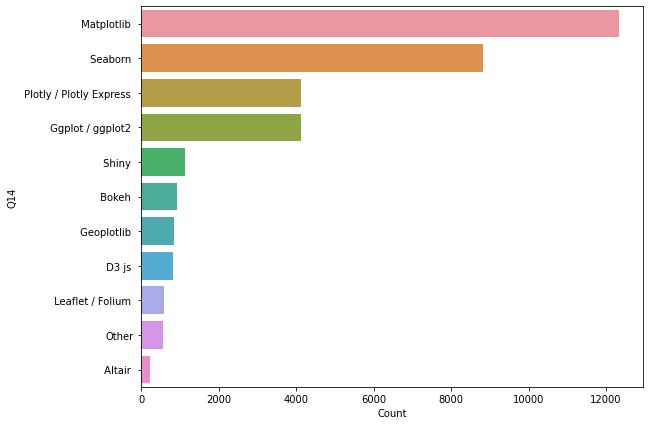

In [28]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q14.index, data=df_Q14)

# Thời gian sử dụng machine learning

In [29]:
df['Q15'].value_counts()


Under 1 year                             6312
1-2 years                                3459
I do not use machine learning methods    2075
2-3 years                                1631
3-4 years                                 893
5-10 years                                801
4-5 years                                 784
10-20 years                               244
20 or more years                          175
Name: Q15, dtype: int64

In [30]:
df['Q15'] = df['Q15'].str.replace('Under ','1-')
df['Q15'] = df['Q15'].str.replace('I do not use machine learning methods', '0-0')
df['Q15'] = df['Q15'].str.replace('or more years','-20')
df['Q15'] = df['Q15'].str.replace('years','')
df['Q15'] = df['Q15'].str.replace('year','')

In [31]:
df['Q15'].isnull().sum(axis=0)

3662

In [32]:
df.Q15.fillna(df.Q15.mode()[0],inplace=True)

In [33]:
df['Q15_Part_1'], df['Q15_Part_2'] = df['Q15'].str.split('-', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [34]:
df["Q15_Part_1"] = pd.to_numeric(df["Q15_Part_1"], errors='coerce').astype('float')
df["Q15_Part_2"] = pd.to_numeric(df["Q15_Part_2"], errors='coerce').astype('float')

In [35]:
df['Q15'] = (df['Q15_Part_1'] + df['Q15_Part_2'])/2

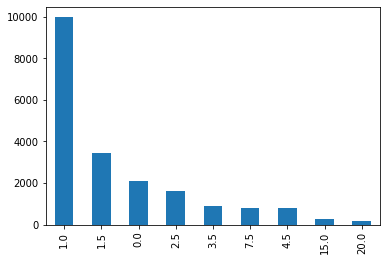

In [36]:
df['Q15'].value_counts().plot(kind = 'bar')

#Q16: Thư viện học máy sử dụng

In [37]:
df_Q16 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q17_")):
        Q16 = df[c].value_counts()
        df_Q16 = df_Q16.append({'Q16':Q16.index[0], 'Count':Q16[0]}, ignore_index=True)
df_Q16 = df_Q16.set_index('Q16').drop('None')
df_Q16= df_Q16.sort_values(by='Count', ascending=False)
df_Q16




,Count
Q16,
Linear or Logistic Regression,10560.0
Decision Trees or Random Forests,8804.0
Convolutional Neural Networks,5859.0
"Gradient Boosting Machines (xgboost, lightgbm, etc)",5134.0
Bayesian Approaches,3647.0
Recurrent Neural Networks,3468.0
"Dense Neural Networks (MLPs, etc)",3364.0
"Transformer Networks (BERT, gpt-3, etc)",1298.0
Generative Adversarial Networks,1024.0


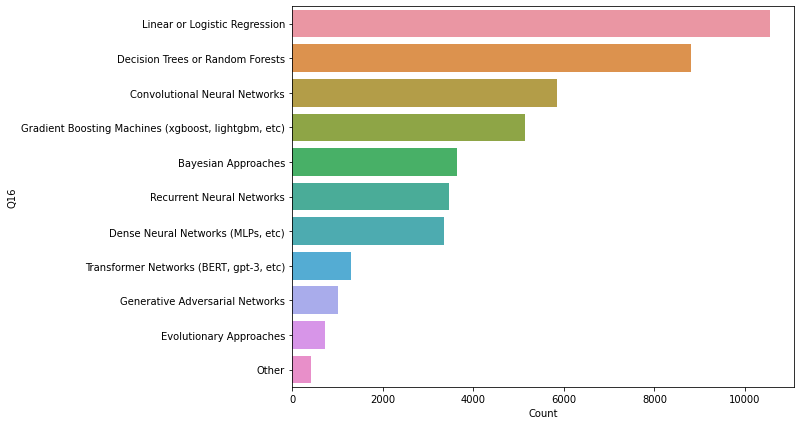

In [38]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q16.index, data=df_Q16)

In [39]:
#Q17: Thuật toán ML thường sử dụng
df_Q17 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q17_")):
        ML_algorithms = df[c].value_counts()
        df_Q17 = df_Q17.append({'ML_algorithms':ML_algorithms.index[0], 'Count':ML_algorithms[0]}, ignore_index=True)
df_Q17 = df_Q17.set_index('ML_algorithms').drop('None')
df_Q17= df_Q17.sort_values(by='Count', ascending=False)
df_Q17

,Count
ML_algorithms,
Linear or Logistic Regression,10560.0
Decision Trees or Random Forests,8804.0
Convolutional Neural Networks,5859.0
"Gradient Boosting Machines (xgboost, lightgbm, etc)",5134.0
Bayesian Approaches,3647.0
Recurrent Neural Networks,3468.0
"Dense Neural Networks (MLPs, etc)",3364.0
"Transformer Networks (BERT, gpt-3, etc)",1298.0
Generative Adversarial Networks,1024.0


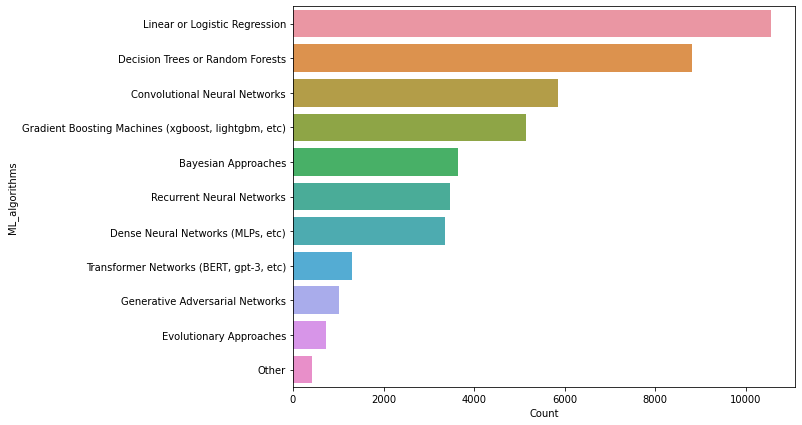

In [40]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q17.index, data=df_Q17)



#Q18: phương pháp thị giác máy tính

In [41]:

df_Q18 = pd.DataFrame()

for c in df.columns:
    if(c.startswith("Q18_")):
        Q18 = df[c].value_counts()
        df_Q18 = df_Q18.append({'Q18':Q18.index[0], 'Count':Q18[0]}, ignore_index=True)
df_Q18 = df_Q18.set_index('Q18').drop('None')
df_Q18= df_Q18.sort_values(by='Count', ascending=False)
df_Q18

,Count
Q18,
"Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)",3512.0
"General purpose image/video tools (PIL, cv2, skimage, etc)",2139.0
"Object detection methods (YOLOv3, RetinaNet, etc)",2079.0
"Image segmentation methods (U-Net, Mask R-CNN, etc)",2003.0
"Generative Networks (GAN, VAE, etc)",1092.0
Other,71.0


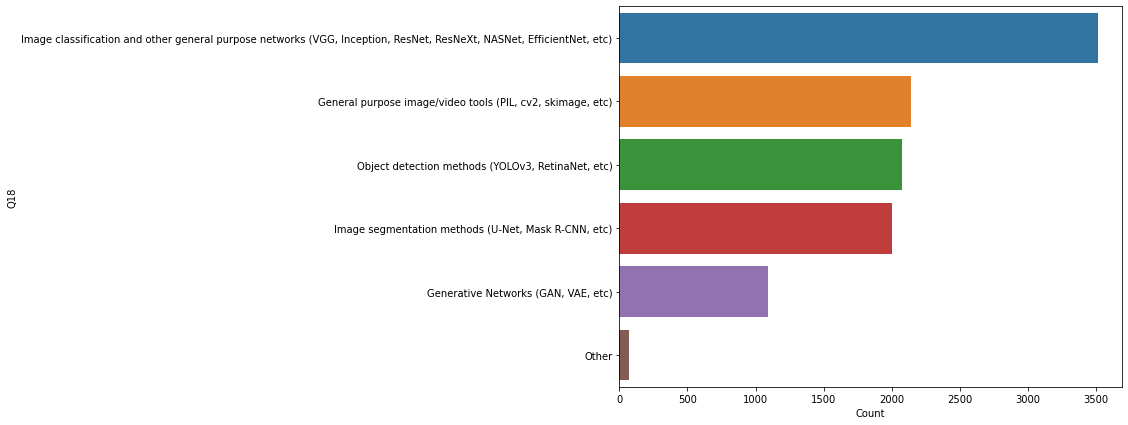

In [42]:
plt.figure(figsize=(9,7))

bars = sns.barplot(x='Count', y=df_Q18.index, data=df_Q18)